In [62]:
using Random
using StatsBase

In [63]:
function generate_data(N)
    # Generate some sample data with known relationship
    θ = randn(N)  # True signal
    n = randn(N)  # Gaussian noise
    ν = 2 * θ + n  # Observed signal with noise
    return θ, ν
end

generate_data (generic function with 1 method)

In [64]:
function lmmse_estimator(y, Cₙₙ, C₀₀, C₀ₙ)
    # Linear Minimum Mean Square Error (LMMSE) Estimator
    # ν: Observed signal
    # Cₙₙ: Autocorrelation matrix of ν
    # C₀₀: Autocorrelation matrix of the true signal θ
    # C₀ₙ: Cross-correlation matrix between θ and ν
    
    # LMMSE Estimator
    H = C₀ₙ / Cₙₙ  # LMMSE filter
    θ̂ = H * y  # Estimated signal
    
    return θ̂
end

lmmse_estimator (generic function with 1 method)

In [65]:
# Example usage
N = 100
θ, ν = generate_data(N)

# Autocorrelation matrices (using a subset to ensure square matrices)

Δ = 0:N-1  # Adjust the lags appropriately
Cₙₙ  = autocor(ν, Δ)
C₀₀ = autocor(θ, Δ)
C₀ₙ = crosscor(θ, ν, Δ);

In [66]:
# LMMSE Estimation
θ̂ₗₘₛₛₑ = lmmse_estimator(ν, Cₙₙ, C₀₀, C₀ₙ);

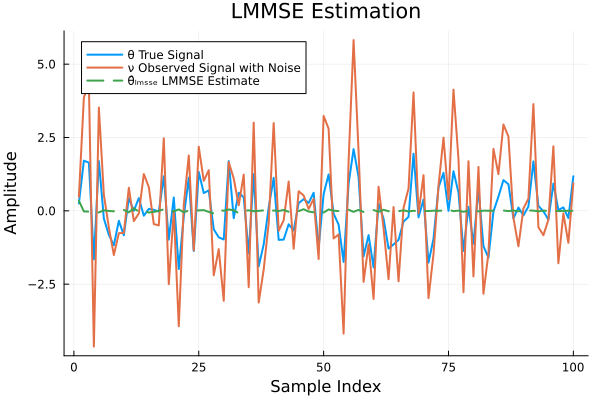

In [67]:
# Display the results
using Plots
plot(θ, label="θ True Signal", linewidth=2, legend=:topleft)
plot!(ν, label="ν Observed Signal with Noise", linewidth=2)
plot!(θ̂ₗₘₛₛₑ, label="θ̂ₗₘₛₛₑ LMMSE Estimate", linestyle=:dash, linewidth=2)
xlabel!("Sample Index")
ylabel!("Amplitude")
title!("LMMSE Estimation")

In [68]:
function blue_estimator(y, Θ)
    # Best Linear Unbiased Estimator (BLUE)
    # y: Observed signal
    # Θ: Design matrix
    
    # Estimate coefficients using least squares
    β = Θ \ y
    
    # Estimated signal
    θ̂ = Θ * β
    
    return θ̂
end

blue_estimator (generic function with 1 method)

In [69]:
# Design matrix
Θ = hcat(ones(N), θ);  # Assuming a simple linear model, [1, θ]

In [70]:
# BLUE Estimation
θ̂ᵦₗᵤₑ = blue_estimator(ν, Θ);

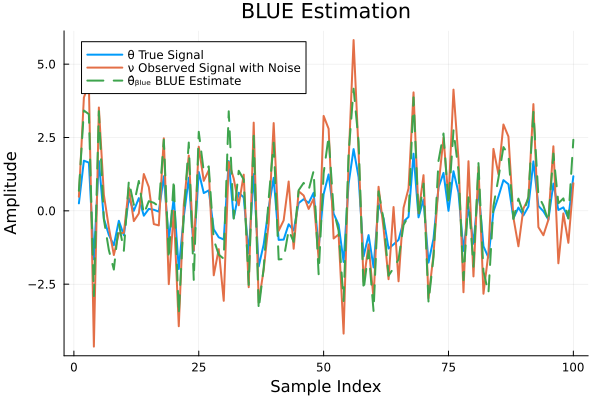

In [71]:
# Display the results
plot(θ, label="θ True Signal", linewidth=2, legend=:topleft)
plot!(ν, label="ν Observed Signal with Noise", linewidth=2)
plot!(θ̂ᵦₗᵤₑ, label="θ̂ᵦₗᵤₑ BLUE Estimate", linestyle=:dash, linewidth=2)
xlabel!("Sample Index")
ylabel!("Amplitude")
title!("BLUE Estimation")

In [72]:
using Distributions

In [73]:
include("linear_model.jl");

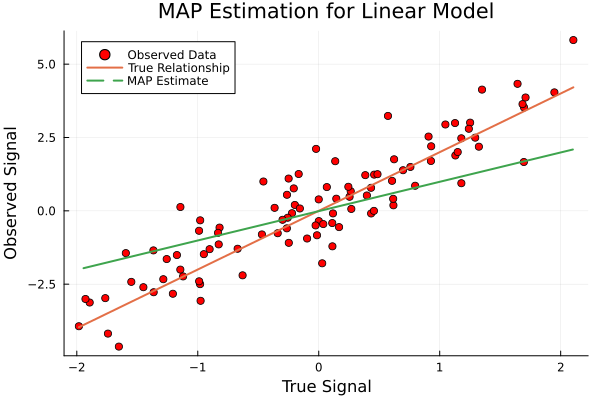

In [81]:
# Create a Model instance
model = Model(0.0, 0.0, 1.0, ν)

# Calculate MAP estimate
β, α = map_estimator(model)

# Plotting
scatter(θ, ν, label="Observed Data", xlabel="True Signal", ylabel="Observed Signal", legend=:topleft, markersize=4, color=:red)
plot!(θ, 2 * θ, label="True Relationship", linewidth=2)
plot!(θ, β .* θ .+ α, label="MAP Estimate", linestyle=:dash, linewidth=2)
title!("MAP Estimation for Linear Model")


$$
\begin{split}
    \text{MSE}(\hat{\theta}) & = \mathbb{E}[(\hat{\theta} - \theta)^2] \\
& = \mathbb{E}\left[\left(\frac{1}{N}\sum_{i=1}^N (X_i) - \theta\right)^2\right] \\
& = \mathbb{E}\left[\left(\frac{1}{N}\sum_{i=1}^N (W_i)\right)^2\right] \\
& = \mathbb{E}\left[\frac{1}{N^2}\left(\sum_{i=1}^N W_i\right)^2\right] \\
& = \frac{1}{N^2}\mathbb{E}\left[\left(\sum_{i=1}^N W_i\right)^2\right]
\end{split}
$$

$
\begin{split}\text{MSE}(\hat{\theta}) & = \frac{1}{N^2}\mathbb{E}\left[\left(\sum_{i=1}^N W_i\right)^2\right] \\
& = \frac{1}{N^2} \cdot N \cdot \sigma^2 \\
& = \frac{\sigma^2}{N}
\end{split}
$

Certainly! The Mean Squared Error (MSE) can indeed be expressed in terms of the expected value $\mathbb{E}$:

$\text{MSE}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2]$

For the estimator $\hat{\theta} = \frac{1}{N}\sum_{i=1}^N X_i$, where $X_i = \theta + W_i$ and $W_i$ is a random variable with mean 0 and variance $\sigma^2$, let's compute the MSE:

$\begin{split}\text{MSE}(\hat{\theta}) & = \mathbb{E}[(\hat{\theta} - \theta)^2] \\
& = \mathbb{E}\left[\left(\frac{1}{N}\sum_{i=1}^N (X_i) - \theta\right)^2\right] \\
& = \mathbb{E}\left[\left(\frac{1}{N}\sum_{i=1}^N (W_i)\right)^2\right] \\
& = \mathbb{E}\left[\frac{1}{N^2}\left(\sum_{i=1}^N W_i\right)^2\right] \\
& = \frac{1}{N^2}\mathbb{E}\left[\left(\sum_{i=1}^N W_i\right)^2\right]
\end{split}$

Now, we need to consider the variance of the sum:

$\text{Var}\left(\sum_{i=1}^N W_i\right) = N \cdot \sigma^2$

Therefore,

$\text{MSE}(\hat{\theta}) = \frac{\sigma^2}{N}$

This confirms that the MSE of the estimator decreases as the sample size $N$ increases, which is consistent with the intuition that larger sample sizes lead to more accurate estimators.

Certainly! If $W_i$ are independent random variables with variance $\sigma^2$, and you're considering the sum of these variables $\sum_{i=1}^N W_i$, then the variance of the sum is given by:

$\text{Var}\left(\sum_{i=1}^N W_i\right) = N \cdot \sigma^2$

Now, if you want to express the standard deviation ($\sigma$), which is the square root of the variance, you get:

$\sigma = \sqrt{\text{Var}\left(\sum_{i=1}^N W_i\right)} = \sqrt{N \cdot \sigma^2}$

This simplifies to:

$\sigma = \sqrt{N} \cdot \sigma$

So, the standard deviation of the sum is $\sqrt{N}$ times the standard deviation of each individual $W_i$.